> Faros Antonios, Student <br />
> Department of Management Science and Technology <br />
> Athens University of Economics and Business <br />
> 8160139<br />
> antonis.faros@gmail.com

This is an assignment for the Course 'Applied Machine Learning' held by  Associate Professor P.Louridas, November 2019

# Exploring Why Civil Resistance Works

In this assignment, you will replicate some of the findings of a well-received book, [Why Civil Resistance Works](https://www.ericachenoweth.com/research/wcrw) by [Erical Chenoweth](https://www.ericachenoweth.com/) and Maria J. Stephan. The two authors examined whether nonviolent campaigns are more effective than violent campaigns. They found that yes; from a data set containing details of campaigns from 1900 onwards, they found that in general peaceful campaigns are more effective in achieving their aims than violent ones.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.formula.api as smf
import statsmodels.api as sm
from patsy import dmatrices
from statsmodels.formula.api import logit
import statsmodels.graphics as sgr
%matplotlib inline

## 1. Frequency of Nonviolent and Violent Campaign End Years

Create a plot showing the frequency of nonviolent and violent campaigns; the frequency should be counted based on their end years, at decades. The violent and nonviolent campaign counts should be stacked on each other.

In [2]:
plt.rcParams.update({'font.size': 14, 'font.weight': 'light','font.family' : 'arial'})
plt.rc('axes', axisbelow=True)
data_filename = 'WCRWreplication.dta'
data = pd.read_stata(data_filename)

In [3]:
data.shape

(323, 85)

As mentioned by the authors from the 323 campaigns in the dataset there is only reliable information regarding the peak membership they consisted of for the 259 of them. That is the reason we do not take into account the whole dataset.

In [4]:
unreliable = data.loc[data.peakmembership.isnull()]
copy = data.copy()

In [5]:
data = data[data.peakmembership.notnull()]

In [6]:
data.shape

(259, 85)

**Note: By changing the following command to : df = data you can see the results regarding only the campaigns we have reliable information for** (regarding their peakmembership as mentioned by the authors in  Chapter 2 'The Primacy of Participation In Nonviolent Resistance' (46-47))

In [7]:
df = copy

In [8]:
df.loc[df['viol']== 1, 'Violent'] = True
df.loc[df['viol'] == 0, 'Violent']= False

In [9]:
df.loc[df['t1']==1,'Decade'] = 1900
df.loc[df['t2']==1,'Decade'] = 1910
df.loc[df['t3']==1,'Decade'] = 1920
df.loc[df['t4']==1,'Decade'] = 1930
df.loc[df['t5']==1,'Decade'] = 1940
df.loc[df['t6']==1,'Decade'] = 1950
df.loc[df['t7']==1,'Decade'] = 1960
df.loc[df['t8']==1,'Decade'] = 1970
df.loc[df['t9']==1,'Decade'] = 1980
df.loc[df['t10']==1,'Decade'] = 1990
df.loc[df['t11']==1,'Decade'] = 2000

In [10]:
grouped =df.groupby('Decade')

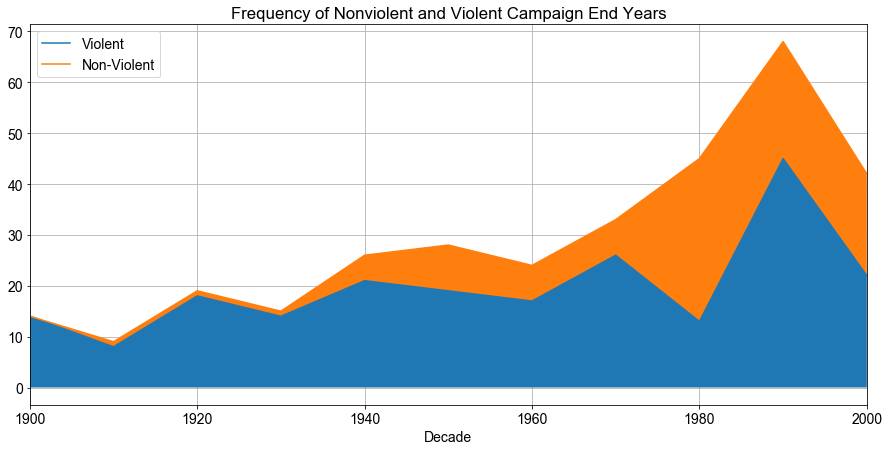

In [12]:
fig, ax = plt.subplots(figsize=(15,7))
arr =grouped['nonviol'].value_counts().unstack()
arr.columns = ['Violent','Non - Violent']

plot =arr.plot(ax = ax,stacked = True, title = 'Frequency of Nonviolent and Violent Campaign End Years', grid = True)
L =plot.legend()
L.get_texts()[0].set_text('Violent')
L.get_texts()[1].set_text('Non-Violent')
line = ax.lines[0]
line2 = ax.lines[1]
y2 = line2.get_ydata()
x = line.get_xdata()
y = line.get_ydata()
plt.fill_between(x,0,y)
plt.fill_between(x,y,y2)

## 2: Number of Nonviolent Campaigns and Percentage of Success

Create a plot showing, for each decade from 1940 onwards, the number of nonviolent campaigns and the percentage of success

In [54]:
violent= df.groupby('Violent')
temp=violent['Decade'].value_counts().unstack()
df1 = temp.iloc[:,4:11] #get the lines from 1940 onwards 

In [55]:
df1 = df1.reset_index()

In [56]:
df1.loc['Totals'] = df1.sum()

In [57]:
viol_totals_temp = df1.loc[df1['Violent']== True]# temporary variable to get totals and violent campaigns per decade
non_viol_temp = df1.loc[df1['Violent']== False]

viol_totals = viol_totals_temp.iloc[:,1:8] #get rid of the column 'Violent'
non_viol = non_viol_temp.iloc[:,1:8]

In [58]:
df2= viol_totals.T

In [59]:
df2.columns = ['No of Violent', 'Totals']

In [60]:
temp = non_viol.T
temp.columns = ['No of Non Violent']

In [61]:
df2 =pd.concat([df2, temp], axis=1)

In [62]:
df2 = df2[['No of Violent','No of Non Violent','Totals']] # Rearrange the columns

We  choose to consider a successful outcome as only the outcome regarding complete succcess of the campaign's goals as noted by the authors in the column 'Success' This means we **do not take into account the probability of a limited success**. 

In [63]:
succ = df.groupby(df.success)
successfull = succ.Decade.value_counts()[1].to_frame()# get only the succesful campaigns

In [64]:
successfull.columns  = ['Number of Successful Campaigns']

In [65]:
successfull =successfull.sort_index().iloc[4:11] #take into consideration the campaigns from 1940 to 2006


In [66]:
df2 =df2.join(successfull, how='outer')

We make the assumption that the percentage of a success in a decade is the amount of successful campaigns during that decade divided by the amount of the total campaigns during the same period. **We will not use this measure for the requested diagram , we only compute it for further analysis.**

In [67]:
df2['Percentage of Success'] = df2['Number of Successful Campaigns']/df2['Totals']

In [68]:
violent_succ = df.loc[(df.outcome == 5) & (df.viol ==1)]# To provide the same diagram we choose to calculate only successes 
non_viol_succ = df.loc[(df.outcome == 5) & (df.nonviol ==1)]
violent_succ =violent_succ.Decade.value_counts().sort_index().iloc[4:11].to_frame()
violent_succ.columns =['Number of Successful Violent']
violent_succ.index.names = ['Decade']

non_viol_succ =non_viol_succ.Decade.value_counts().sort_index().iloc[1:11].to_frame()
non_viol_succ.columns =['Number of Successful  Non Violent']
non_viol_succ.index.names = ['Decade']

In [69]:
df2['Successful Violent'] =violent_succ['Number of Successful Violent']

In [70]:
df2['Successful Non Violent']=non_viol_succ['Number of Successful  Non Violent']

In [71]:
df2['Success Rate of Violent'] = df2['Successful Violent']/ df2['No of Violent']

In [72]:
df2['Success Rate of  Non-Violent'] = df2['Successful Non Violent']/ df2['No of Non Violent']

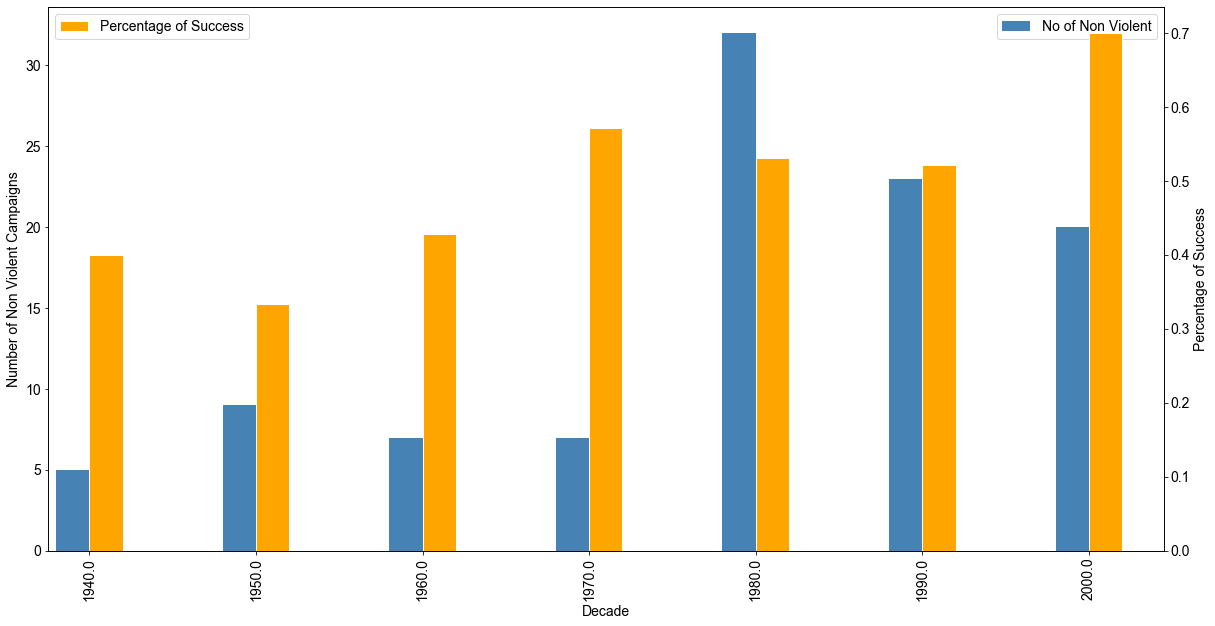

In [73]:
fig = plt.figure(figsize=(20,10)) #Fix axes
ax = fig.add_subplot(111) 
ax2 = ax.twinx() # Create another axes that shares the same x-axis as ax.
width = 0.2
temp.plot(kind='bar', color='steelblue', ax=ax, width=width, position=1)
df2['Success Rate of  Non-Violent'].plot(kind='bar', color='orange', ax=ax2, width=width, position=0, edgecolor ='white')

ax.set_ylabel('Number of Non Violent Campaigns')
ax2.set_ylabel('Percentage of Success')
leg = plt.legend()
leg.get_texts()[0].set_text('Percentage of Success')

ax.set_yticks(np.arange(0, 35, 5))
ax.set_xlabel('Decade')
ax2.set_yticks(np.arange(0, 0.8, 0.1))
plt.show()

## 3: Success Rate by Decade

Create a plot showing the success rate for violent and nonviolent campaigns by decade.


In [74]:
df2 =df2.reset_index()


In [75]:
df2

,Decade,No of Violent,No of Non Violent,Totals,Number of Successful Campaigns,Percentage of Success,Successful Violent,Successful Non Violent,Success Rate of Violent,Success Rate of Non-Violent
0,1940.0,21.0,5.0,26.0,9,0.346154,7,2,0.333333,0.400000
1,1950.0,19.0,9.0,28.0,10,0.357143,7,3,0.368421,0.333333
2,1960.0,17.0,7.0,24.0,7,0.291667,4,3,0.235294,0.428571
3,1970.0,26.0,7.0,33.0,14,0.424242,10,4,0.384615,0.571429
4,1980.0,13.0,32.0,45.0,22,0.488889,5,17,0.384615,0.531250
5,1990.0,45.0,23.0,68.0,24,0.352941,12,12,0.266667,0.521739
6,2000.0,22.0,20.0,42.0,17,0.404762,3,14,0.136364,0.700000


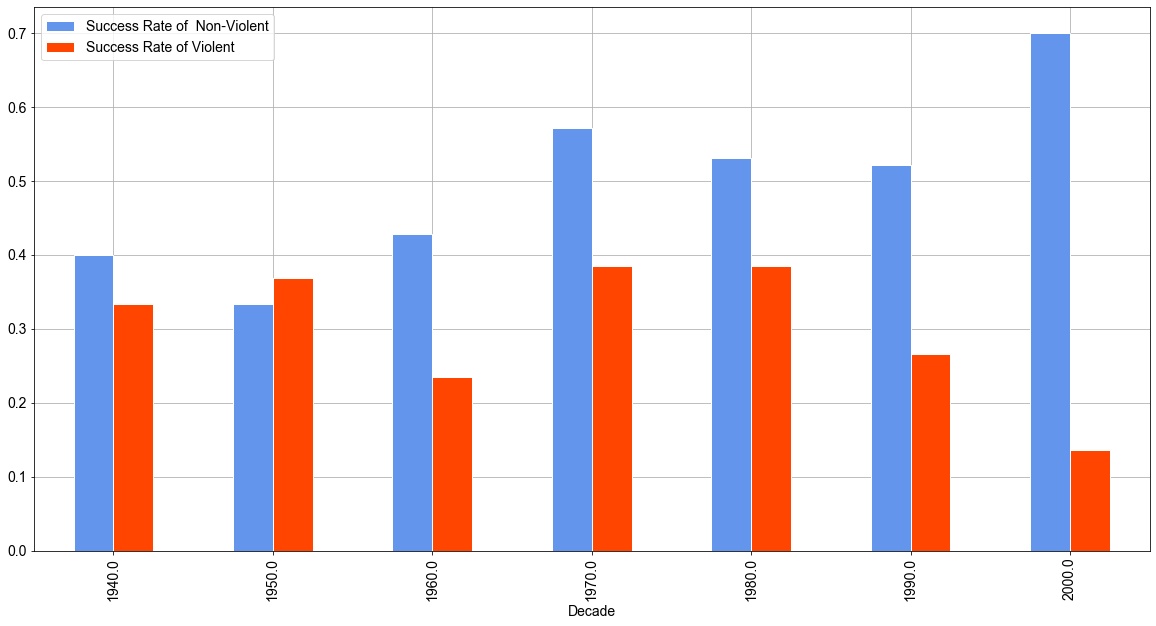

In [76]:
df2.plot(x= 'Decade', y = ['Success Rate of  Non-Violent','Success Rate of Violent'],figsize=(20,10), grid=True,kind ='bar',color =['cornflowerblue','orangered'],edgecolor ='white')

## 4. Twenty-Five Largest Resistance Campaigns, 1900-2006

Create a table with the twenty-five largest resistance campaigns, for all years, based on their number of members at highest point (peak membership). The table should include the membership, the start year, the end year, the location, the target, whether it was violent or not, and whether it was successful or not. Notice if you find anything about Greece.

In [77]:
largest = df.sort_values(by =['peakmembership'],ascending =False)

In [78]:
bli =largest[['peakmembership','byear','eyear','location','target','Violent','success']]

In [79]:
larg = bli.head(25)
larg.columns  =['PEAK MEMBERSHIP', 'BEGINNING YEAR',' END YEAR','LOCATION','TARGET','VIOLENT','OUTCOME']

In [80]:
larg.loc[larg['OUTCOME'] == 0 ,'OUTCOME'] = 'FAILURE'
larg.loc[larg['OUTCOME'] == 1, 'OUTCOME'] = 'SUCCESS'

C:\Users\tfaro\Anaconda3\lib\site-packages\pandas\core\indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


In [81]:
larg

,PEAK MEMBERSHIP,BEGINNING YEAR,END YEAR,LOCATION,TARGET,VIOLENT,OUTCOME
257,4500000.0,1937,1945,China,Japanese occupation,True,FAILURE
206,2000000.0,1977,1979,Iran,Shah Reza Pahlavi,False,SUCCESS
311,2000000.0,1986,1983,Philippines,Ferdinand Marcos,False,SUCCESS
289,1000000.0,1988,1988,Burma,military junta,False,FAILURE
265,1000000.0,1989,1989,China,Communist regime,False,FAILURE
262,1000000.0,1967,1968,China,anti-Maoists,True,FAILURE
255,1000000.0,1922,1949,China,Kuomintang regime,True,SUCCESS
10,1000000.0,2006,2006,Mexico,Calderon regime,False,FAILURE
228,1000000.0,2005,2005,Lebanon,Syrian forces,False,SUCCESS
141,1000000.0,1993,1999,Nigeria,Military rule,False,SUCCESS


* We notice a record in the top 25 campaigns based on the amount of membership about Greece. By searching through the web regarding this event of 1963 we came to the coclusion that the specified campaign was against the Karamanlis regime. That campaign occured because of the confliction he had during 1963 with the royal family of Greece during that period. The same year Labrakis assasination occured and the situation in Greek politics was intense. More information available at https://el.wikipedia.org/wiki/%CE%9A%CF%89%CE%BD%CF%83%CF%84%CE%B1%CE%BD%CF%84%CE%AF%CE%BD%CE%BF%CF%82_%CE%9A%CE%B1%CF%81%CE%B1%CE%BC%CE%B1%CE%BD%CE%BB%CE%AE%CF%82 / Paragraph 3.9

## 5. The Effect of Participation on the Probability of Campaign Success

Examine the effect of participation on the probability of campaign success. You should run a logistic regression for success on membership per capita, controlling for the location’s logged population the year the campaign ends. Explain your results.

In [82]:
df_clean  = df[['mempc','lnpop','success']]

In [83]:
df_clean = df_clean.dropna() #Clean the dataset for nulls

In [84]:
df_clean = df_clean.sort_values(by='mempc')

In [85]:
success_mod = logit("success ~ mempc + lnpop", df_clean).fit()

success_mod.summary2()

Optimization terminated successfully.
         Current function value: 0.594790
         Iterations 5


<class 'statsmodels.iolib.summary2.Summary'>
"""
                         Results: Logit
=================================================================
Model:              Logit            Pseudo R-squared: 0.129     
Dependent Variable: success          AIC:              199.9014  
Date:               2019-11-30 17:05 BIC:              209.1827  
No. Observations:   163              Log-Likelihood:   -96.951   
Df Model:           2                LL-Null:          -111.35   
Df Residuals:       160              LLR p-value:      5.5508e-07
Converged:          1.0000           Scale:            1.0000    
No. Iterations:     5.0000                                       
------------------------------------------------------------------
               Coef.   Std.Err.     z     P>|z|    [0.025   0.975]
------------------------------------------------------------------
Intercept     -5.8199    1.9207  -3.0301  0.0024  -9.5843  -2.0555
mempc          4.4892    0.9857   4.5545  0.0000   2.5573   6.4210
lnpop          0.0907    0.1285   0.7058  0.4803  -0.1612   0.3426
=================================================================

"""

* One unit increase in Membership per capita brings an increase of 4.4892 in the log odds of a successfull campaign; equivalently, the odds ratio increases by $e^{4.4892} \approx 89$ or **890%**. This is obviously a huge increase but we should keep in mind that membership per capita is most commonly a number between 0.6 and 2 so a 1 unit increase is probably unlikely. Despite that, it is the most major indicator of the importance of membership per capita in a campaign's success on the specific analysis. 


* By also taking into consideration the Z value of the independend variable mempc we can see that is significantly high and by that we can identify the fact that it is really important for our depended variable (success).


* The intercept is the log odds of a succesful campaign when all the independent variables are held at zero; that is $e^{-5.8199} \approx 0.0029$. That means that $p / (1-p) = 0.0029$, or $p \approx 0.0028$.


* One unit increase in Logged Location Population brings an increase of 0.0907 in the log odds of a successfull campaign; equivalently, the odds ratio increases by $e^{0.0907} \approx 1.095$ or $ 9.5$ %.

In [86]:
predictions =success_mod.predict(df_clean)

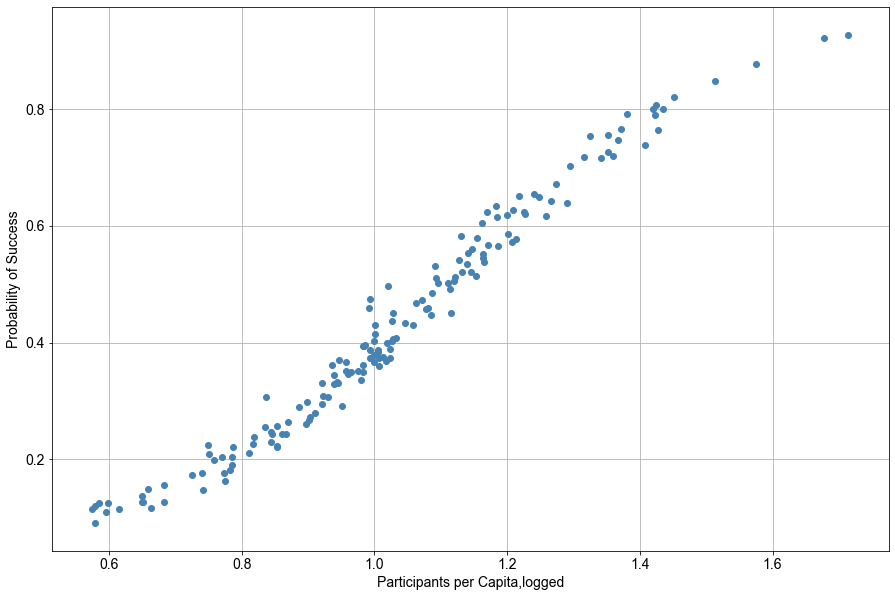

In [87]:
fig = plt.figure(figsize=(15,10))
ax = fig.add_subplot(111)
ax.scatter(df_clean.mempc,predictions,color = 'steelblue')
ax.set_ylabel('Probability of Success')
ax.set_xlabel('Participants per Capita,logged')
plt.grid()

## 6. The Level of Participation Tipping Point

From the results you obtained in the previous question, find the percentage of the population that is the tipping point for success in a campaign.

In [88]:
import scipy.interpolate
interp_func = scipy.interpolate.interp1d(predictions,df_clean.mempc)
xnew = interp_func(0.5)
print(xnew)

1.0710100365403739


The tipping point of a success is the point in which we would assume we would have greater chances for a successful outcome. In order for those chances to be in favor of us we should consider it as a random event . We would only assume for a successful outcome only if that outcome's probability is more than 50%. Thus, the tipping point would be the point of Participation per Capita in which we achieve more than this percentage.**In specific it is more than 1.071 participants per capita.**

As defined by the authors, membership per capita (mempc) is the division of logged membership(lmembers) by logged population (lnpop). 

This means that $mempc$ =$\frac{ln(membership)}{ln(population)}$ = $k $

$\to$ $ln(membership)$ = $ k * 
ln(population)$

$\to$ $membership$ =   $e^{kln(population)} $ 

$\to$ $membership $= $population^k$ 

$\to$ $\frac{membership}{population}$ = $\frac{population^k}{population}$

$\to$ $\frac{membership}{population}$ = $population^{k-1}$ , $polulation >0$

In our case $k = 1.071$ so **the percentage of population** required for a campaign to be succesful is $ population ^{0.071}$ %

**Hong Kong's** Police estimated the membership during the recent events of June 2019 to 240.000 participants.
Based on our calculation the participants required to be successful were **227.476** as $3.074$%(7.4 million population).
https://en.wikipedia.org/wiki/2019_Hong_Kong_protests

## 7. Nonviolent Resistance, Target Regime Type, Geographical Location

1. Examine whether nonviolent resistance remains significant even if we control for the regime type. Run a logistic   regression of success on the nonviolence indicator controlling for the POLITY IV score of campaign target (`tpolity`), the log of peakmembership, and the location’s logged population the year the campaign ends.



In [89]:
regime_df = df[['success','nonviol','tpolity','lmembers','lnpop']]

In [90]:
regime_clean = regime_df.dropna()

In [91]:
nonviol_mod = logit("success ~ nonviol + tpolity + lmembers +lnpop", regime_clean).fit()

nonviol_mod.summary2()

Optimization terminated successfully.
         Current function value: 0.567143
         Iterations 6


<class 'statsmodels.iolib.summary2.Summary'>
"""
                         Results: Logit
=================================================================
Model:              Logit            Pseudo R-squared: 0.163     
Dependent Variable: success          AIC:              169.9344  
Date:               2019-11-30 17:05 BIC:              184.6782  
No. Observations:   141              Log-Likelihood:   -79.967   
Df Model:           4                LL-Null:          -95.506   
Df Residuals:       136              LLR p-value:      2.9528e-06
Converged:          1.0000           Scale:            1.0000    
No. Iterations:     6.0000                                       
------------------------------------------------------------------
               Coef.   Std.Err.     z     P>|z|    [0.025   0.975]
------------------------------------------------------------------
Intercept     -0.1085    1.4130  -0.0768  0.9388  -2.8779   2.6609
nonviol        0.9048    0.4636   1.9517  0.0510  -0.0038   1.8134
tpolity        0.0520    0.0298   1.7439  0.0812  -0.0064   0.1104
lmembers       0.3751    0.1282   2.9264  0.0034   0.1239   0.6263
lnpop         -0.4363    0.1423  -3.0671  0.0022  -0.7151  -0.1575
=================================================================

"""

* One unit increase in tpolity(towards more democratic regimes) brings an increase of 0.0520 in the log odds of a successfull campaign; equivalently, the odds ratio increases by $e^{0.0520} \approx 1.05$. or $5 $ % increase.


* One unit increase in the nonviolent indicator( violent$\to$ nonviolent) brings an increase of 0.904 in the log odd of a succesful campaign; equivanently, the odds ratio increases by $e^{0.904} \approx 2.47$or $247$% increase.



As we can see **the nonviolent indicator remains very significant even if we control for the regime type.**
The number of campaign participants also remains significant increasing the likelihood of success.

Therefore, whether the opponent is democratic or nondemocratic seems
to matter little with regard to the success of nonviolent campaigns.

2. Examine whether nonviolent resistance remains significant even if we control for geographical location of the campaign.

In [92]:

mapping = {1 : 'America',2 :'Asia',3:'Africa',4:'Europe',5:'FSU',6:'Middle East'}

df.loc[df.americas == 1, 'geoloc'] = 1
df.loc[df.asia == 1, 'geoloc'] = 2
df.loc[df.africa == 1, 'geoloc'] = 3
df.loc[df.europe == 1,'geoloc'] = 4
df.loc[df.fsu ==1,'geoloc'] = 5
df.loc[df.middleeast == 1, 'geoloc'] = 6

In [93]:
geoloc_df = df[['success','nonviol','geoloc']]

In [94]:
geoloc_df_clean = geoloc_df.dropna()

In [95]:
geoloc_mod = logit("success ~ nonviol + C(geoloc)", geoloc_df_clean).fit()

geoloc_mod.summary2()

Optimization terminated successfully.
         Current function value: 0.591713
         Iterations 6


<class 'statsmodels.iolib.summary2.Summary'>
"""
                         Results: Logit
=================================================================
Model:              Logit            Pseudo R-squared: 0.083     
Dependent Variable: success          AIC:              396.2465  
Date:               2019-11-30 17:05 BIC:              422.6901  
No. Observations:   323              Log-Likelihood:   -191.12   
Df Model:           6                LL-Null:          -208.47   
Df Residuals:       316              LLR p-value:      4.9505e-06
Converged:          1.0000           Scale:            1.0000    
No. Iterations:     6.0000                                       
-----------------------------------------------------------------
                   Coef.  Std.Err.    z    P>|z|   [0.025  0.975]
-----------------------------------------------------------------
Intercept         -0.6770   0.3065 -2.2088 0.0272 -1.2777 -0.0763
C(geoloc)[T.2.0]  -0.7993   0.3951 -2.0230 0.0431 -1.5736 -0.0249
C(geoloc)[T.3.0]  -0.0369   0.3729 -0.0989 0.9212 -0.7678  0.6940
C(geoloc)[T.4.0]  -0.5954   0.4339 -1.3723 0.1700 -1.4457  0.2549
C(geoloc)[T.5.0]  -0.2959   0.5418 -0.5462 0.5849 -1.3578  0.7660
C(geoloc)[T.6.0]  -1.0604   0.5178 -2.0479 0.0406 -2.0753 -0.0456
nonviol            1.2582   0.2648  4.7515 0.0000  0.7392  1.7771
=================================================================

"""

* A unit increase of nonviol indicator creates a 1.2582 increase in the log odds, equivanently equivalently, the odds ratio increases by $e^{1.2582} \approx 3.5$ or $350 $ % increase.


* We can observe by those results than nonviolence indicator **remains robust even if we control the geographic location.**


* **There is a significant difference though.** We can observe  that the location codes 2 and 6 (**Asia and Middle East**) have an important participation in the probability of success **despite the nonviolent indicator**.( The log odds for these locations decrease by a much lower amount).


* The interpretation of that would be that those locations have lower success rates despite of the type (violent or non violent) of the campaign.


* Last, the overall results(including the previous analysis) suggest that **nonviolent campaigns are more probable to succeed than violent.**